# Viet, DT

In [87]:
from perform_kickstarer_eda import *

In [88]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [89]:
param_grid = {
    'max_depth': range(1, 21, 2),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validated accuracy: 0.9216408434542332


In [90]:
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

y_pred = best_dt_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Accuracy: {accuracy:.4f}")

# Evaluate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Accuracy: 0.9154

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2902
           1       0.86      0.85      0.86      1224

    accuracy                           0.92      4126
   macro avg       0.90      0.90      0.90      4126
weighted avg       0.92      0.92      0.92      4126


Confusion Matrix:
[[2736  166]
 [ 183 1041]]


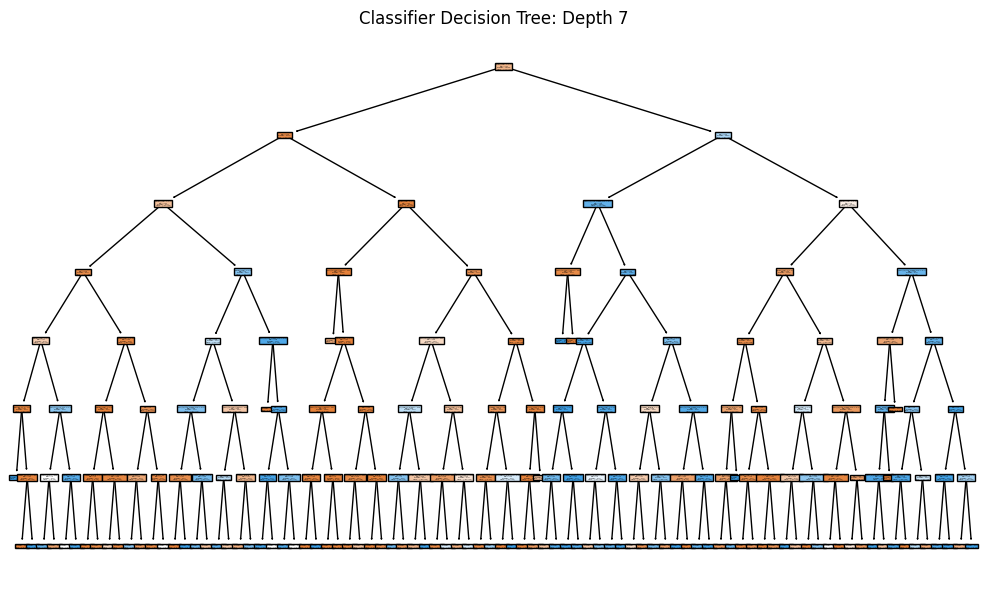

In [91]:
feature_names = X_train.columns if hasattr(X_train, 'columns') else None
plt.figure(figsize=(10, 6))
plot_tree(best_dt_model, filled=True,
          feature_names=feature_names,
          precision=2, proportion=True)
plt.title(f"Classifier Decision Tree: Depth {best_dt_model.get_depth()}")
plt.tight_layout()
plt.show()

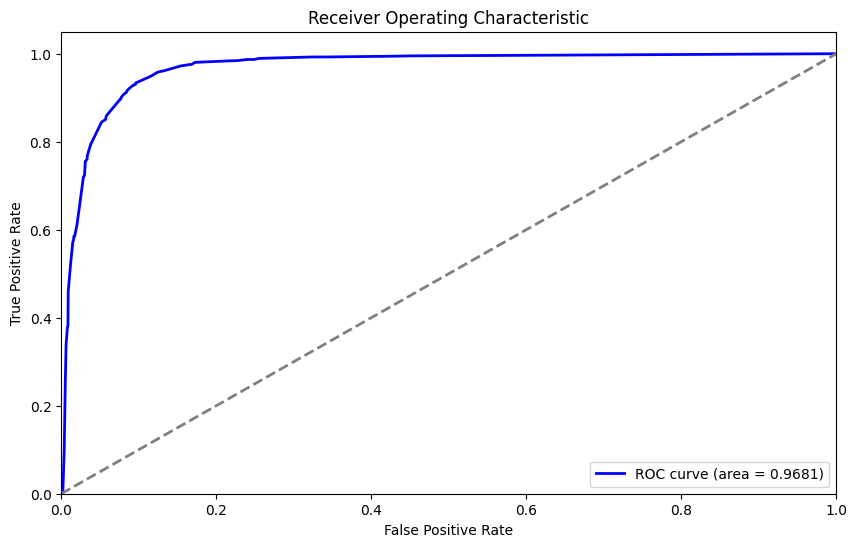

In [92]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curve
y_scores = best_dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds2 = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

/var/folders/09/7fcnlqx173v03wyt8sxj1lzh0000gn/T/ipykernel_37325/2199355194.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_samples['param_max_depth'] = default_samples['param_max_depth'].fillna(-1)


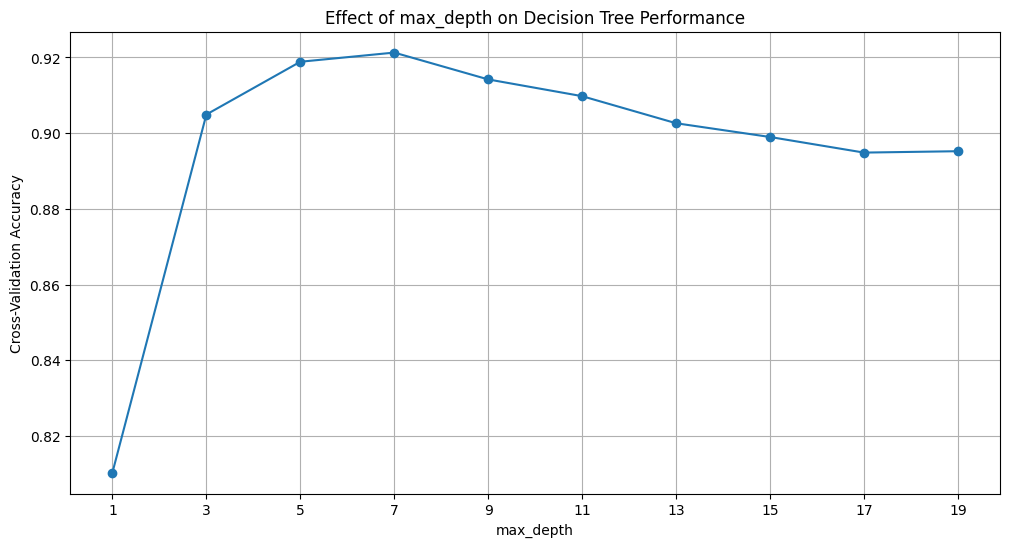

In [93]:
# Visualize hyperparameter tuning results
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(12, 6))

# Filter results for default min_samples values
default_samples = results[(results['param_min_samples_split'] == 2) &
                         (results['param_min_samples_leaf'] == 1)]

# Convert None to -1 for plotting purposes
default_samples['param_max_depth'] = default_samples['param_max_depth'].fillna(-1)

# Sort by max_depth for proper x-axis order
default_samples = default_samples.sort_values('param_max_depth')

# Plot the results
plt.plot(default_samples['param_max_depth'],
         default_samples['mean_test_score'],
         marker='o', linestyle='-')

# Replace -1 with "None" in xticks
x_ticks = default_samples['param_max_depth'].unique()
x_labels = [str(int(x)) if x > 0 else "None" for x in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.xlabel('max_depth')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Effect of max_depth on Decision Tree Performance')
plt.grid(True)
plt.show()